### **Titanic Classification:**

Question: How can I create a system to predict if a person will survive the Titanic sinking and identify key factors influencing survival like socio-economic status, age, and gender?

## **About the Dataset**

The data has been split into two groups:

training set (train.csv)

test set (test.csv)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pandas - used to perform data manipulation and analysis

numpy - used to perform a wide variety of mathematical operations on arrays

matplotlib - used for data visualization and graphical plotting

seaborn - built on top of matplotlib with similar functionalities

%matplotlib - to enable the inline plotting.

warnings - to manipulate warnings details

filterwarnings('ignore') is to ignore the warnings thrown by the modules (gives clean results)

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving train.csv to train.csv


In [ ]:
Train=pd.read_csv('train.csv')
Train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving test.csv to test.csv


In [ ]:
Test=pd.read_csv('test.csv')
Test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## **Statistical information**

In [ ]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There is missing values in Age and Cabin

In [ ]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
Train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We fill the missing values using mean.

In [ ]:
mean_age = Train['Age'].mean()
Train['Age'].fillna(mean_age, inplace=True)

In [ ]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
mean_age_T = Test['Age'].mean()
Test['Age'].fillna(mean_age_T, inplace=True)

In [ ]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

Encode the categorical variable 'Sex' in the 'Train' DataFrame

In [ ]:
label_encoder = LabelEncoder()
Train['Sex'] = label_encoder.fit_transform(Train['Sex'])

In [ ]:
Test['Sex'] = label_encoder.fit_transform(Test['Sex'])

In [ ]:
Train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,C


## **EDA**

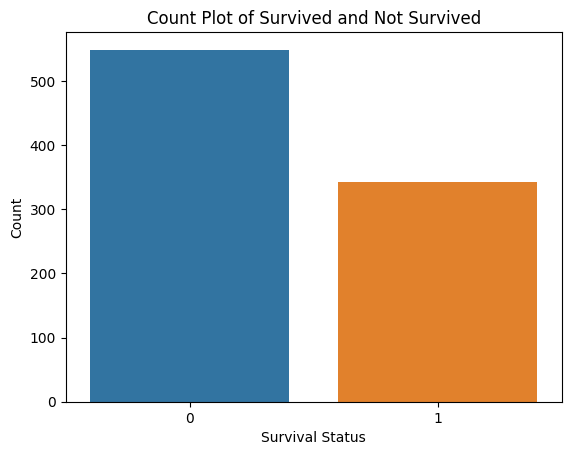

In [ ]:
sns.countplot(x='Survived', data=Train)
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.title('Count Plot of Survived and Not Survived')

plt.show()

In [ ]:
survived_counts = Train['Survived'].value_counts()

In [ ]:
print("Number of people who survived:", survived_counts[1])
print("Number of people who did not survive:", survived_counts[0])

Number of people who survived: 342
Number of people who did not survive: 549


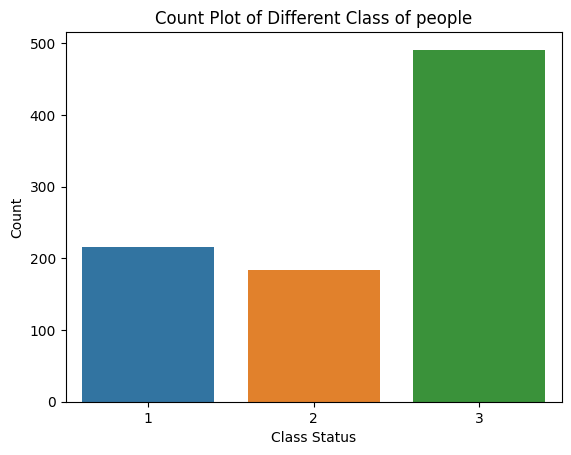

In [ ]:
sns.countplot(x='Pclass', data=Train)
plt.xlabel('Class Status')
plt.ylabel('Count')
plt.title('Count Plot of Different Class of people')

plt.show()

In [ ]:
class_counts = Train['Pclass'].value_counts()

In [ ]:
print("Number of 1st class people:", class_counts[1])
print("Number of 2nd class people:", class_counts[2])
print("Number of 3rd class people:", class_counts[3])

Number of 1st class people: 216
Number of 2nd class people: 184
Number of 3rd class people: 491


There is uneven distribution due to the 3rd class passengers.

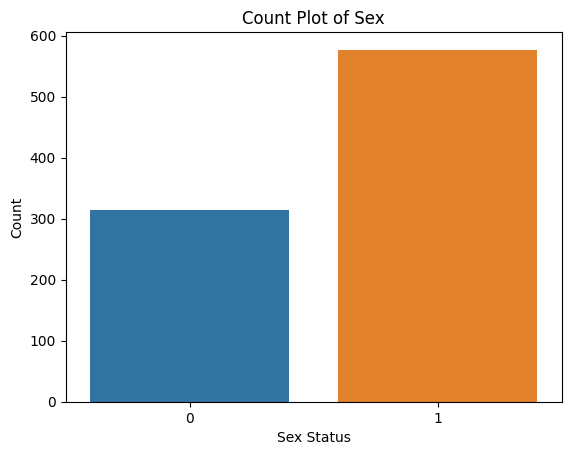

In [ ]:
sns.countplot(x='Sex', data=Train)
plt.xlabel('Sex Status')
plt.ylabel('Count')
plt.title('Count Plot of Sex')

plt.show()

In [ ]:
sex_counts = Train['Sex'].value_counts()

In [ ]:
print("Number of male people:", sex_counts[1])
print("Number of female people:", sex_counts[0])

Number of male people: 577
Number of female people: 314


We observe more males than females.

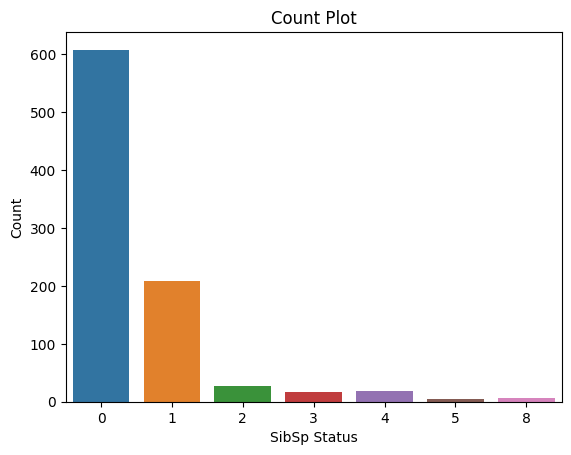

In [ ]:
sns.countplot(x='SibSp',data=Train)
plt.xlabel('SibSp Status')
plt.ylabel('Count')
plt.title('Count Plot')

plt.show()

0 indicates the number of travellers travel solo. So, solo travelers are more

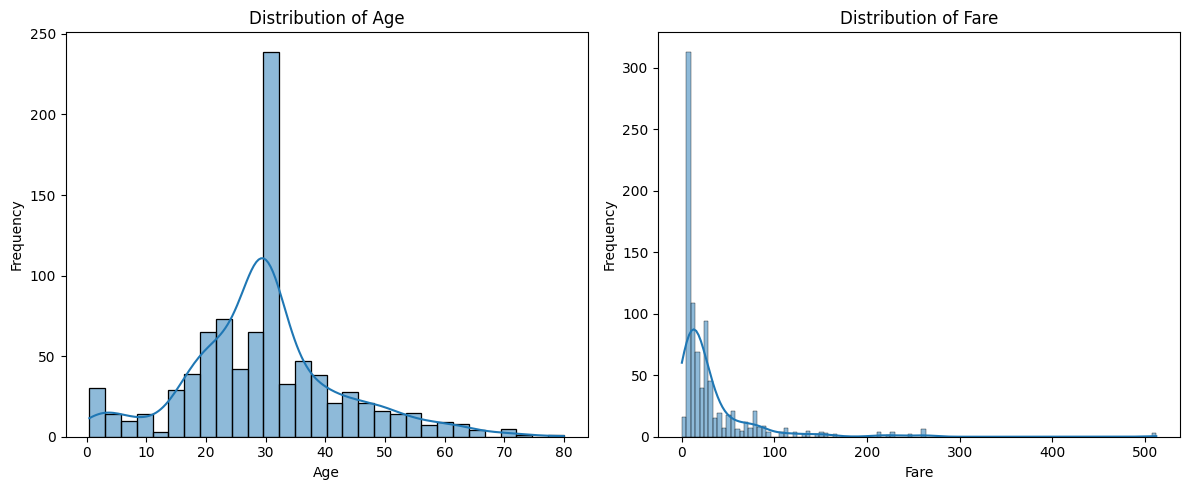

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.histplot(Train['Age'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

sns.histplot(Train['Fare'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Fare')
axes[1].set_xlabel('Fare')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

These are the histogram representing distribution of age and fare. Distribution of age is approaximately normally distributed and distribution of fare is positively skewed.

### **compare ticket classes by creating a new graph using a pivot table.**

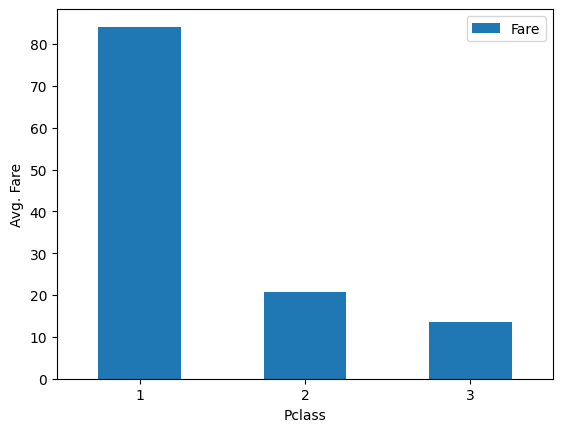

In [ ]:
class_fare = Train.pivot_table(index='Pclass', values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg. Fare')
plt.xticks(rotation=0)
plt.show()

First class travellers spend average fare of more than 80 . Second class travellers spend average fare of around 20. Second class travellers spend average fare of between 10 to 20.

<Axes: xlabel='Pclass', ylabel='Fare'>

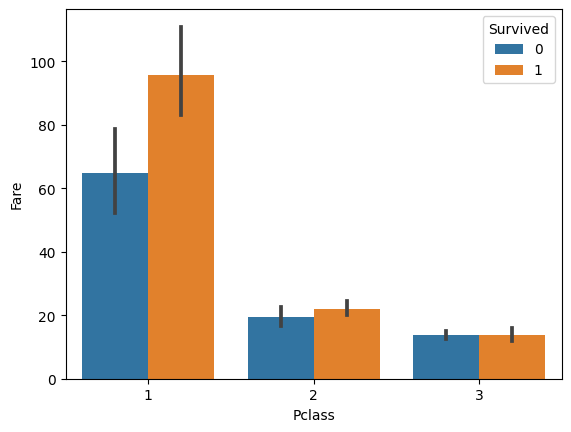

In [ ]:
sns.barplot(data=Train, x='Pclass', y='Fare', hue='Survived')

In first class travellers, the people who survived spend average fare more than 90. But the people who didn't survived spend average fare around 70.

In Second class travellers, the people who survived spend average fare more than 20. But the people who didn't survived spend average fare around 20.

In Third class travellers, the people who survived and the people who didn't survived spend average fare more than 10.

<Axes: xlabel='Survived', ylabel='Fare'>

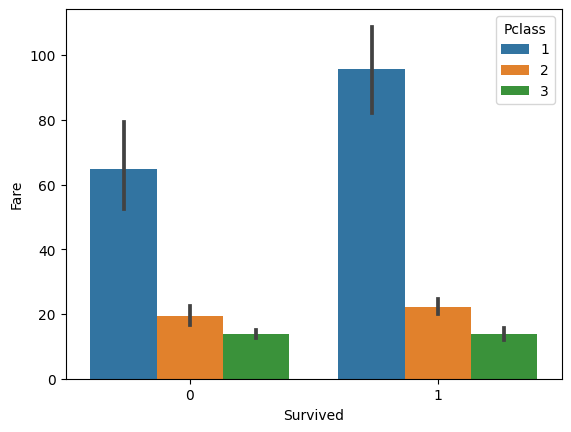

In [ ]:
sns.barplot(data=Train, x='Survived', y='Fare', hue='Pclass')

Removed unnecessary columns.

In [ ]:
Train1=Train.drop(columns=['PassengerId','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Name'],axis=1)

<Axes: >

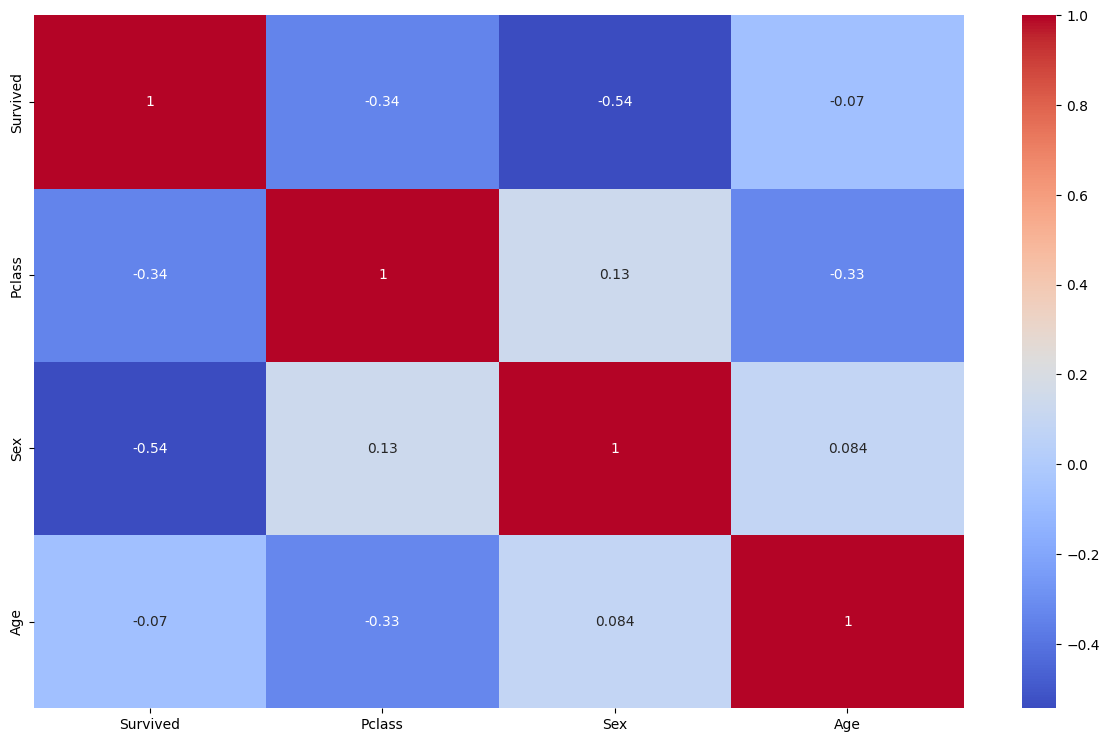

In [ ]:
corr = Train1.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

## Train-Test Split

Split the training data into test and train datas.

In [ ]:
Train1

,Survived,Pclass,Sex,Age
0,0,3,1,22.000000
1,1,1,0,38.000000
2,1,3,0,26.000000
3,1,1,0,35.000000
4,0,3,1,35.000000
...,...,...,...,...
886,0,2,1,27.000000
887,1,1,0,19.000000
888,0,3,0,29.699118
889,1,1,1,26.000000


In [ ]:
X = Train1.drop('Survived', axis=1)
y = Train1['Survived']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
Test1=Test.drop(columns=['PassengerId','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Name'],axis=1)
Test1

,Pclass,Sex,Age
0,3,1,34.50000
1,3,0,47.00000
2,2,1,62.00000
3,3,1,27.00000
4,3,0,22.00000
...,...,...,...
413,3,1,30.27259
414,1,0,39.00000
415,3,1,38.50000
416,3,1,30.27259


### Model Training

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
# classify column
def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print('Accuracy:', model.score(x_test, y_test))

    score = cross_val_score(model, X, y, cv=5)
    print('CV Score:', np.mean(score))

## Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model)

Accuracy: 0.8026905829596412
CV Score: 0.7878789780930261


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model)

Accuracy: 0.7623318385650224
CV Score: 0.8013935095097608


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model)

Accuracy: 0.7623318385650224
CV Score: 0.805875337392505


## XGBoost

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
classify(model)

Accuracy: 0.8026905829596412
CV Score: 0.8013997865796245


## CatBoost

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.7 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(verbose=0)
classify(model)

Accuracy: 0.7937219730941704
CV Score: 0.7957567007720796


In [ ]:
import pandas as pd

data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'CatBoost'],
    'Accuracy': [0.8026, 0.7623, 0.7623, 0.8026, 0.7937],
    'CV Score': [0.7878, 0.8013, 0.8058, 0.8013, 0.7957]
}

results_df = pd.DataFrame(data)
print(results_df)


                 Model  Accuracy  CV Score
0  Logistic Regression    0.8026    0.7878
1        Decision Tree    0.7623    0.8013
2        Random Forest    0.7623    0.8058
3              XGBoost    0.8026    0.8013
4             CatBoost    0.7937    0.7957


XGBoost has high CV Value compared to other models. also it has high accuracy rate.

In [ ]:
model = XGBClassifier()
model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
Test1

,Pclass,Sex,Age
0,3,1,34.50000
1,3,0,47.00000
2,2,1,62.00000
3,3,1,27.00000
4,3,0,22.00000
...,...,...,...
413,3,1,30.27259
414,1,0,39.00000
415,3,1,38.50000
416,3,1,30.27259


In [ ]:
pred = model.predict(Test1)
pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
predicted_df = pd.DataFrame({'Survived': pred})

In [ ]:
Test1['Survived'] = predicted_df['Survived']
Test1

,Pclass,Sex,Age,Survived
0,3,1,34.50000,0
1,3,0,47.00000,0
2,2,1,62.00000,0
3,3,1,27.00000,1
4,3,0,22.00000,1
...,...,...,...,...
413,3,1,30.27259,0
414,1,0,39.00000,1
415,3,1,38.50000,0
416,3,1,30.27259,0


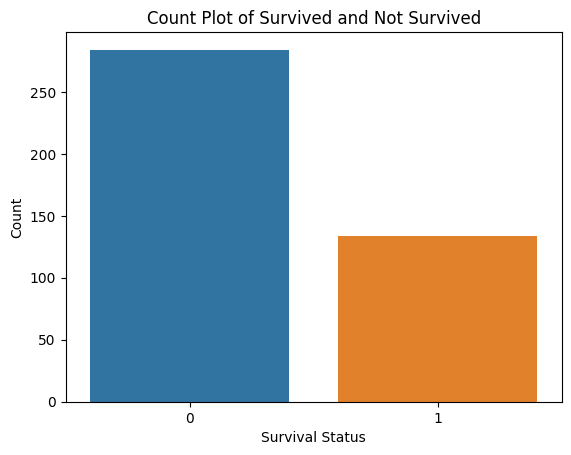

In [ ]:
sns.countplot(x='Survived', data=Test1)
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.title('Count Plot of Survived and Not Survived')

plt.show()

In [ ]:
survived_counts3 = Test1['Survived'].value_counts()

In [ ]:
print("Number of people who survived:", survived_counts3[1])
print("Number of people who did not survive:", survived_counts3[0])

Number of people who survived: 134
Number of people who did not survive: 284
